<a href="https://colab.research.google.com/github/vj012/Image-Compression/blob/main/Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.io import loadmat
from KMeans import *

Loading Image

In [ ]:
Image = loadmat("bird_small.mat")
A = Image["A"]

In [ ]:
#Checking the shape
A.shape

(128, 128, 3)

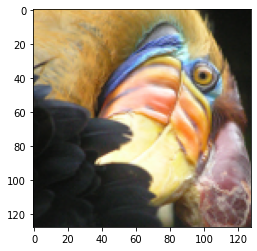

In [ ]:
img = plt.imshow(A)

PRE Processing Image

In [ ]:
A

array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

In [ ]:
X = (A/255).reshape(A.shape[0]*A.shape[1],3)
X

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       ...,
       [0.25490196, 0.16862745, 0.15294118],
       [0.22745098, 0.14509804, 0.14901961],
       [0.20392157, 0.15294118, 0.13333333]])

In [ ]:
def CompressedImage(X,K,num_iter):
        kmeans = KMeans(K)
        initial_centriod = kmeans.kMeansInitCentroids(X)
        compressed_Centriod,conpressed_idx = kmeans.runKmeans(X,initial_centriod,num_iter)
        X_Compressed = X.copy()
        for i in range(1,K+1):
            X_Compressed[(conpressed_idx == i).ravel(),:] = compressed_Centriod[i-1]
        return X_Compressed

In [ ]:
X_Compressed = CompressedImage(X,16,10)
X_Compressed = X_Compressed.reshape(A.shape[0],A.shape[1],3)
X = X.reshape(A.shape[0],A.shape[1],3)

Visualize Image

In [ ]:
def plot_image(Orginal,Compressed): 
    fig,ax = plt.subplots(1,2)
    Img1 = ax[0].imshow(Orginal)
    Img2 = ax[1] .imshow(Compressed)
    for i in range(2):
        title = ["Orginal","Compressed"]
        ax[i].set_title(title[i])

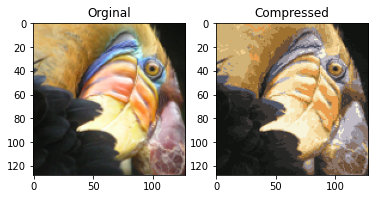

In [ ]:
plot_image(X,X_Compressed)

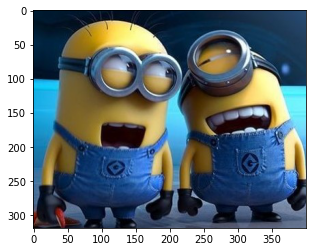

In [ ]:
img = mpimg.imread('1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
A = img
A.shape

(319, 400, 3)

In [ ]:
K = 8
num_iter = 10
X = (A/255).reshape(A.shape[0]*A.shape[1],3)
X.shape

(127600, 3)

In [ ]:
X_Compressed = CompressedImage(X,K,num_iter)

In [ ]:
X_Compressed = X_Compressed.reshape(A.shape[0],A.shape[1],3)
X = X.reshape(A.shape[0],A.shape[1],3)

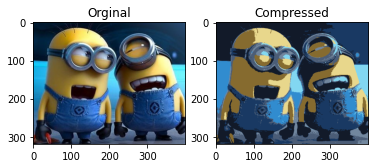

In [ ]:
plot_image(X,X_Compressed)